# **Data Visualization**

In this part, I will apply data visualization in Python to discover insights about the key objectives. Using Matplotlib and Seaborn, I visualized horizontal bar charts to display the distribution of the top programming languages, databases, web frameworks, platforms, collaboration tools, and tech tools for both used and desired cases. These visualizations will serve as the key indicators for finding the current popular technologies and future trends.

## Repository

Check out the repository on [GitHub](https://github.com/FaiLuReH3Ro/data-visualization-py) for more details.

## Dataset Used

I will use various tables in the database (`survey-data.db`) that were created during the [Handling Outliers](https://www.kaggle.com/code/failureh3ro/handling-outliers-python/notebook) section.

### Tables

* __main__ - Main unedited table
* __noOutCompT__ - Table with no outliers in `CompTotal` column
* __noOutCompY__ - Table with no outliers in `ConvertedCompYearly` column

The tables are derived from [clean_survey_data.csv](https://www.kaggle.com/datasets/failureh3ro/stack-overflow-survey-2024-cleaned-data).

## Objectives

* Connect to the SQLite database
* Find the most popular technologies from the data
* Visualize the results

## Technologies 

<ul>
    <li>Programming Languages</li>
    <li>Databases</li>
    <li>Platforms</li>
    <li>Web Frameworks</li>
    <li>Tools Tech</li>
    <li>Collaboration Tools</li>
</ul>

## Download and Import Libraries

In [1]:
# Run this cell if the libraries are not installed
# Uncomment the lines below to install
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install sqlite3

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Suppress warnings
# Comment before running to view warnings
import warnings
warnings.filterwarnings("ignore")

## Connect to SQLite3 Database

Since we already created the database, we can easily easily access the tables by creating a connection.

> Note: If the database has not been created and running locally, refer to the [Handling_Outliers](https://www.kaggle.com/code/failureh3ro/handling-outliers-python/notebook) notebook and run the cells to create the database and the three tables.

In [3]:
# Create a connection to the SQLite database named 'survey-data.db'
# If running locally, run the top line
# conn = sqlite3.connect('survey-data.db')
conn = sqlite3.connect('/kaggle/input/handling-outliers-python/survey-data.db')

### Verify Tables

In [4]:
# SQL query to select the table names
QUERY = """
SELECT name as Table_Name
FROM sqlite_master
WHERE type = 'table'
"""

# Read the query to a df
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main
1,noOutCompT
2,noOutCompY


<h2 id="language">Programming Languages</h2>

Let's find the top 10 most popular programming languages the survey respondents worked with (`LanguageHaveWorkedWith`) and want to work with (`LanguageWantToWorkWith`).

All of the technologies columns have values separated by a semicolon. Therefore, I can't group by the technology when querying the database. Instead, I will split each value into an array and explode the dataframe. This will separate each technology so it's only one technology in one cell.

### Worked With

In [5]:
# Select languages worked with
QUERY = """SELECT LanguageHaveWorkedWith FROM main"""

# Read to df
df_lang_worked = pd.read_sql(QUERY, conn)

In [6]:
# Split by the separator
df_lang_worked['LanguageHaveWorkedWith'] = df_lang_worked['LanguageHaveWorkedWith'].str.split(";")

# Explode the df
df_lang_worked = df_lang_worked.explode('LanguageHaveWorkedWith')
df_lang_worked

,LanguageHaveWorkedWith
0,Bash/Shell (all shells)
0,Go
0,HTML/CSS
0,Java
0,JavaScript
...,...
59744,Java
59744,JavaScript
59744,PHP
59744,Python


In [7]:
# Find the top 10 languages
top10_lang_worked = df_lang_worked['LanguageHaveWorkedWith'].value_counts().sort_values(ascending=False).head(10).reset_index()
top10_lang_worked

,LanguageHaveWorkedWith,count
0,JavaScript,37492
1,HTML/CSS,31816
2,Python,30719
3,SQL,30682
4,TypeScript,23150
5,Bash/Shell (all shells),20412
6,Java,18239
7,C#,16318
8,C++,13827
9,C,12184


### Want to Work With

In [8]:
# Select languages want to work with
QUERY = """SELECT LanguageWantToWorkWith FROM main"""

# Read to df
df_lang_want = pd.read_sql(QUERY, conn)

In [9]:
# Split the values into an array
df_lang_want['LanguageWantToWorkWith'] = df_lang_want['LanguageWantToWorkWith'].str.split(";")

# Explode the df
df_lang_want = df_lang_want.explode('LanguageWantToWorkWith')

In [10]:
# Finding the top 10
top10_lang_want = df_lang_want['LanguageWantToWorkWith'].value_counts().sort_values(ascending=False).head(10).reset_index()
top10_lang_want


,LanguageWantToWorkWith,count
0,Python,25047
1,JavaScript,23774
2,SQL,22400
3,HTML/CSS,20721
4,TypeScript,20239
5,Rust,17232
6,Go,13837
7,Bash/Shell (all shells),13744
8,C#,12921
9,C++,10873


### Visualizing

Let's visualize both the top 10 languages worked with and want to work with together.

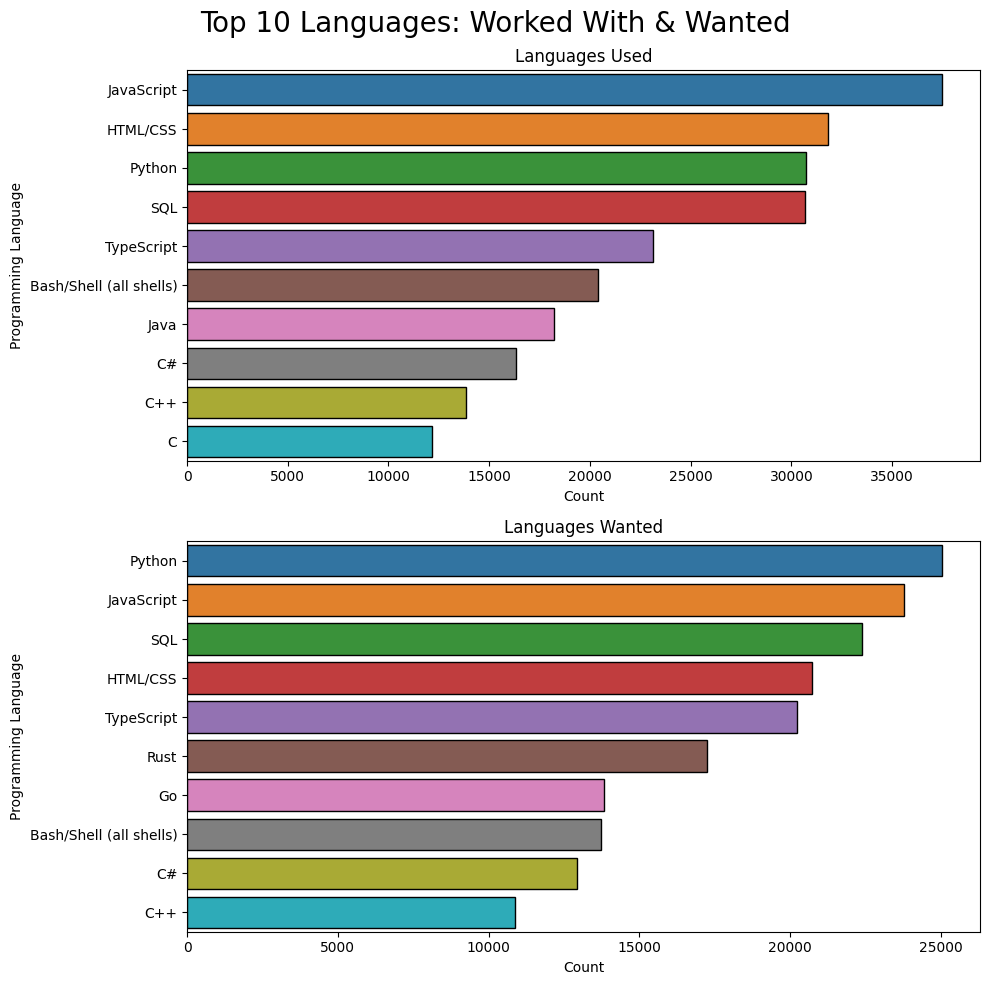

In [11]:
fig, axes = plt.subplots(2,1, figsize=(10,10))
fig.suptitle("Top 10 Languages: Worked With & Wanted", fontsize=20)

# Bar graph #1 - Top 10 Languages Worked With
sns.barplot(top10_lang_worked, x='count', y='LanguageHaveWorkedWith', hue='LanguageHaveWorkedWith', edgecolor = 'black', ax=axes[0], dodge = False)
axes[0].set_title("Languages Used")
axes[0].set_ylabel("Programming Language")
axes[0].set_xlabel("Count")
axes[0].get_legend().remove()

# Bar graph #2 - Top 10 Languages Wanted
sns.barplot(top10_lang_want, x='count', y='LanguageWantToWorkWith', hue='LanguageWantToWorkWith', edgecolor = 'black', ax=axes[1], dodge = False)
axes[1].set_title("Languages Wanted")
axes[1].set_ylabel("Programming Language")
axes[1].set_xlabel("Count")
axes[1].get_legend().remove()

plt.tight_layout()
plt.show()

Out the top 10, 9 languages were present in both cases. `Java` is in the top 10 for languages worked with but not in the top 10 for languages wanted to use. Conversely, `Go` is in the top 10 for languages wanted to want with but not in languages wanted to use. 

<h2 id="database">Databases</h2>

Let's find the top 10 most popular databases respondents worked with (`DatabaseHaveWorkedWith`) and want to work with (`DatabaseWantToWorkWith`).

### Worked With

In [12]:
# Select databases worked with
QUERY = """SELECT DatabaseHaveWorkedWith FROM main"""

# Read to df
df_db_worked = pd.read_sql(QUERY, conn)

In [13]:
# Split values into array
df_db_worked['DatabaseHaveWorkedWith'] = df_db_worked['DatabaseHaveWorkedWith'].str.split(";")

# Explode the df
df_db_worked = df_db_worked.explode('DatabaseHaveWorkedWith')

In [14]:
# Find the top 10
top10_db_worked = df_db_worked.value_counts().sort_values(ascending=False).head(10).reset_index()
top10_db_worked

,DatabaseHaveWorkedWith,count
0,PostgreSQL,25504
1,MySQL,21058
2,SQLite,17347
3,Microsoft SQL Server,13250
4,MongoDB,12992
5,Redis,10451
6,MariaDB,8979
7,Elasticsearch,6523
8,Oracle,5253
9,Dynamodb,4133


### Want to Work With

In [15]:
# Select databases wanted
QUERY = """SELECT DatabaseWantToWorkWith FROM main"""

# Read to df
df_db_want = pd.read_sql(QUERY, conn)

In [16]:
# Split the values
df_db_want['DatabaseWantToWorkWith'] = df_db_want['DatabaseWantToWorkWith'].str.split(";")

# Explode the df
df_db_want = df_db_want.explode('DatabaseWantToWorkWith')

In [17]:
# Find the top 10
top10_db_want = df_db_want.value_counts().sort_values(ascending=False).head(10).reset_index()
top10_db_want

,DatabaseWantToWorkWith,count
0,PostgreSQL,23977
1,SQLite,13474
2,MySQL,12239
3,MongoDB,10964
4,Redis,10837
5,Microsoft SQL Server,7883
6,Elasticsearch,6243
7,MariaDB,5940
8,Dynamodb,3501
9,Supabase,2924


### Visualizing 

Let's visualize both instances and compare the differences.

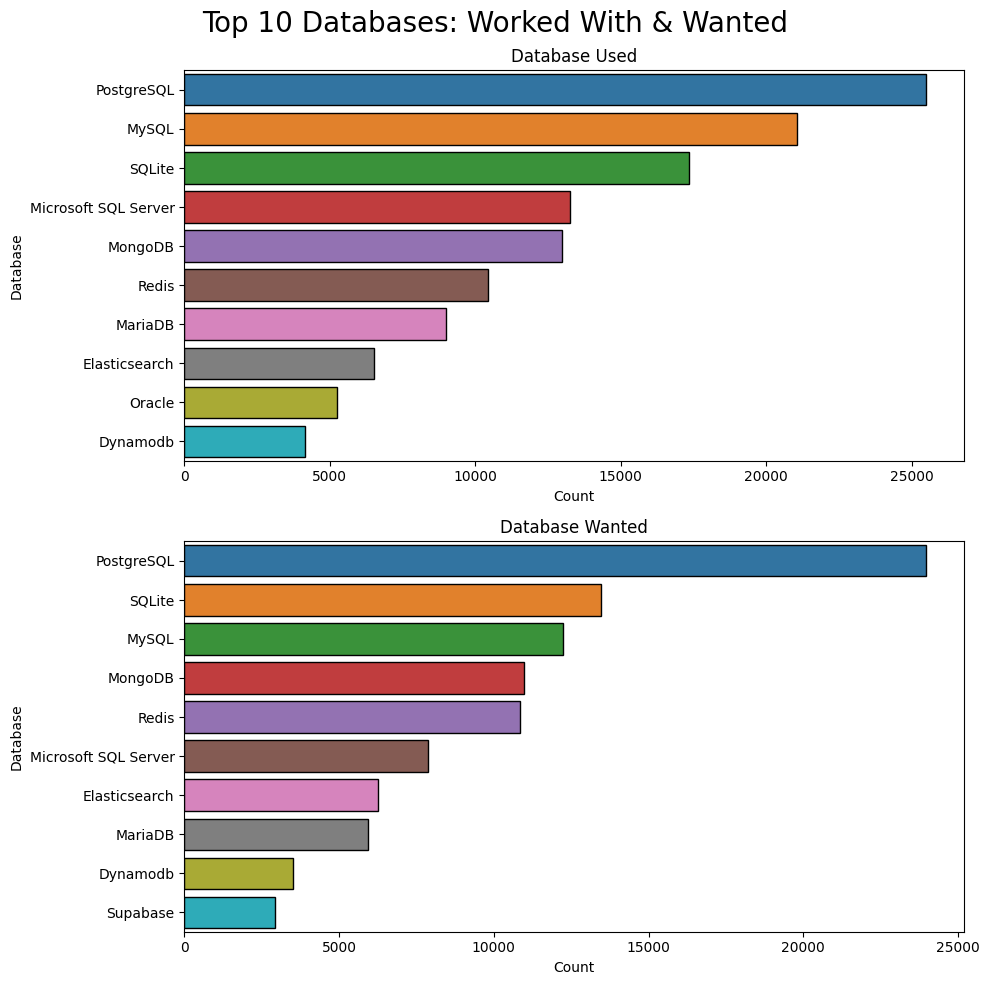

In [18]:
fig, axes = plt.subplots(2,1, figsize=(10,10))
fig.suptitle("Top 10 Databases: Worked With & Wanted", fontsize=20)

# Bar graph #1 - Top 10 Databases Worked With
sns.barplot(top10_db_worked, x='count', y='DatabaseHaveWorkedWith', hue='DatabaseHaveWorkedWith', edgecolor = 'black', ax=axes[0], dodge = False)
axes[0].set_title("Database Used")
axes[0].set_ylabel("Database")
axes[0].set_xlabel("Count")
axes[0].get_legend().remove()

# Bar graph #2 - Top 10 Databases Wanted
sns.barplot(top10_db_want, x='count', y='DatabaseWantToWorkWith', hue='DatabaseWantToWorkWith', edgecolor = 'black', ax=axes[1], dodge = False)
axes[1].set_title("Database Wanted")
axes[1].set_ylabel("Database")
axes[1].set_xlabel("Count")
axes[1].get_legend().remove()

plt.tight_layout()
plt.show()

There is also not much variation between both cases. 9 databases are present in both databases used and desired. The `Oracle` database is only in the 'worked with' plot and the `Supabase` database in only in the 'wanted' plot.

<h2 id="platform">Platforms</h2>

Let's find the top 10 most popular platforms respondents worked with (`PlatformHaveWorkedWith`) and want to work with (`PlatformWantToWorkWith`).

### Worked With

In [19]:
# Select the platforms worked and store to a df
df_plat_worked = pd.read_sql("SELECT PlatformHaveWorkedWith FROM main", conn)

# Split the values
df_plat_worked['PlatformHaveWorkedWith'] = df_plat_worked['PlatformHaveWorkedWith'].str.split(";")

# Explode the df
df_plat_worked = df_plat_worked.explode('PlatformHaveWorkedWith')

# Find the top 10
top10_plat_worked = df_plat_worked.value_counts().sort_values(ascending=False).head(10).reset_index()
top10_plat_worked 

,PlatformHaveWorkedWith,count
0,Amazon Web Services (AWS),22139
1,Microsoft Azure,12818
2,Google Cloud,11555
3,Cloudflare,6953
4,Firebase,6419
5,Vercel,5481
6,Digital Ocean,5398
7,Heroku,3786
8,Netlify,3230
9,VMware,3028


### Want to Work With

In [20]:
# Select the platforms wanted and store to a df
df_plat_want = pd.read_sql("SELECT PlatformWantToWorkWith FROM main", conn)

# Split the values
df_plat_want['PlatformWantToWorkWith'] = df_plat_want['PlatformWantToWorkWith'].str.split(";")

# Explode the df
df_plat_want = df_plat_want.explode('PlatformWantToWorkWith')

# Find the top 10
top10_plat_want = df_plat_want.value_counts().sort_values(ascending=False).head(10).reset_index()
top10_plat_want 

,PlatformWantToWorkWith,count
0,Amazon Web Services (AWS),18004
1,Microsoft Azure,10278
2,Google Cloud,9739
3,Cloudflare,6862
4,Firebase,4933
5,Vercel,4602
6,Digital Ocean,4496
7,Hetzner,2455
8,Supabase,2277
9,Netlify,2208


### Visualizing

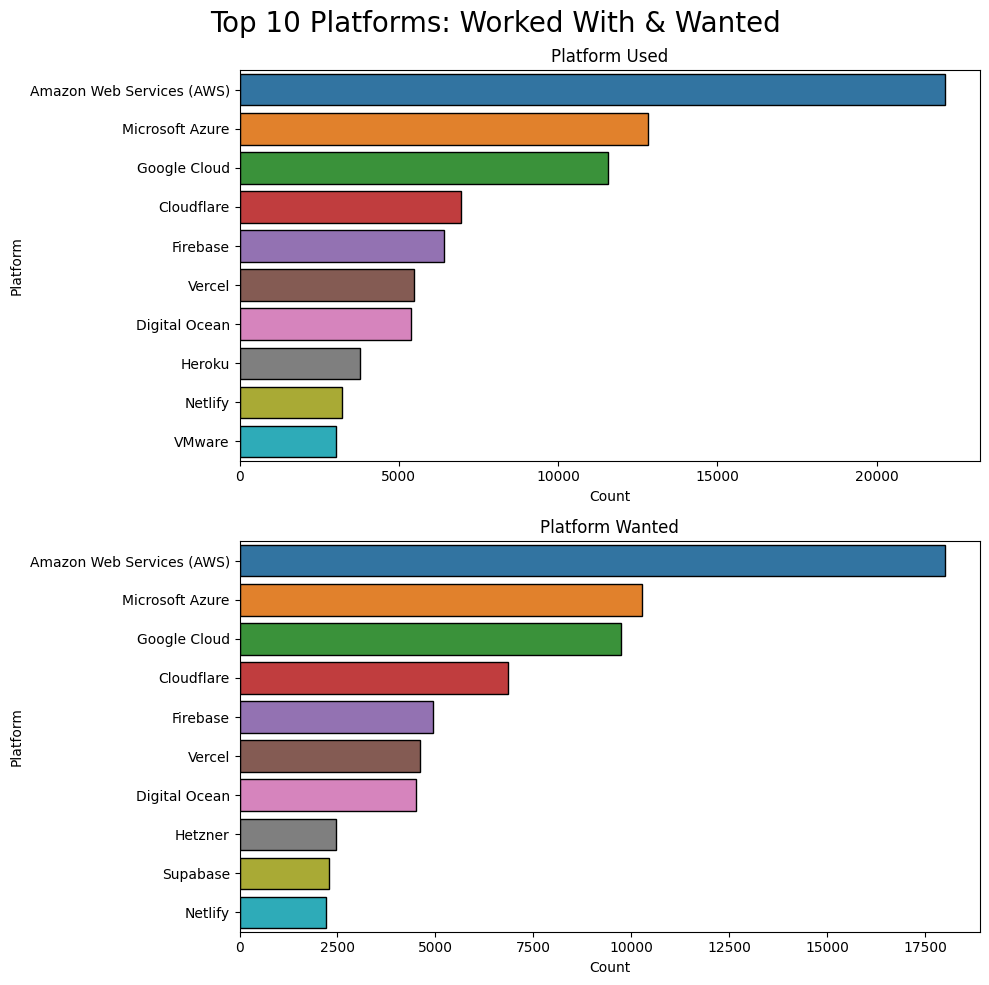

In [21]:
fig, axes = plt.subplots(2,1, figsize=(10,10))
fig.suptitle("Top 10 Platforms: Worked With & Wanted", fontsize=20)

# Bar graph #1 - Top 10 Platforms Worked With
sns.barplot(top10_plat_worked, x='count', y='PlatformHaveWorkedWith', hue='PlatformHaveWorkedWith', edgecolor = 'black', ax=axes[0], dodge = False)
axes[0].set_title("Platform Used")
axes[0].set_ylabel("Platform")
axes[0].set_xlabel("Count")
axes[0].get_legend().remove()

# Bar graph #2 - Top 10 Platforms Wanted
sns.barplot(top10_plat_want, x='count', y='PlatformWantToWorkWith', hue='PlatformWantToWorkWith', edgecolor = 'black', ax=axes[1], dodge = False)
axes[1].set_title("Platform Wanted")
axes[1].set_ylabel("Platform")
axes[1].set_xlabel("Count")
axes[1].get_legend().remove()

plt.tight_layout()
plt.show()

Once again, platforms follow a similar trend like databases and languages. 9 platforms out of 10 are present in both plots. `VMware` is only in the 'worked with' graph and `Supabase` is only in the wanted graph. Interestingly, `Supabase` was also in the top 10 databases desired.

<h2 id="webframe">Web Frameworks</h2>

Let's find the top 10 most popular web frameworks respondents worked with (`WebframeHaveWorkedWith`) and want to work with (`WebframeWantToWorkWith`).

### Worked With

In [22]:
# Select the web frameworks worked with and store to a df
df_web_worked = pd.read_sql("SELECT WebframeHaveWorkedWith FROM main", conn)

# Split the values
df_web_worked['WebframeHaveWorkedWith'] = df_web_worked['WebframeHaveWorkedWith'].str.split(";")

# Explode the df
df_web_worked = df_web_worked.explode('WebframeHaveWorkedWith')

# Find the top 10
top10_web_worked = df_web_worked.value_counts().sort_values(ascending=False).head(10).reset_index()
top10_web_worked 

,WebframeHaveWorkedWith,count
0,Node.js,19744
1,React,19146
2,jQuery,10375
3,Next.js,8671
4,Express,8608
5,Angular,8286
6,ASP.NET CORE,8178
7,Vue.js,7470
8,ASP.NET,6255
9,Flask,6238


### Want to Work With

In [23]:
# Select the web frameworks wanted and store to a df
df_web_want = pd.read_sql("SELECT WebframeWantToWorkWith FROM main", conn)

# Split the values
df_web_want['WebframeWantToWorkWith'] = df_web_want['WebframeWantToWorkWith'].str.split(";")

# Explode the df
df_web_want = df_web_want.explode('WebframeWantToWorkWith')

# Find the top 10
top10_web_want = df_web_want.value_counts().sort_values(ascending=False).head(10).reset_index()
top10_web_want 

,WebframeWantToWorkWith,count
0,React,15383
1,Node.js,14718
2,Next.js,8496
3,Vue.js,7593
4,ASP.NET CORE,6896
5,Angular,6345
6,Express,5613
7,Svelte,5370
8,Spring Boot,5060
9,Django,4965


### Visualizing

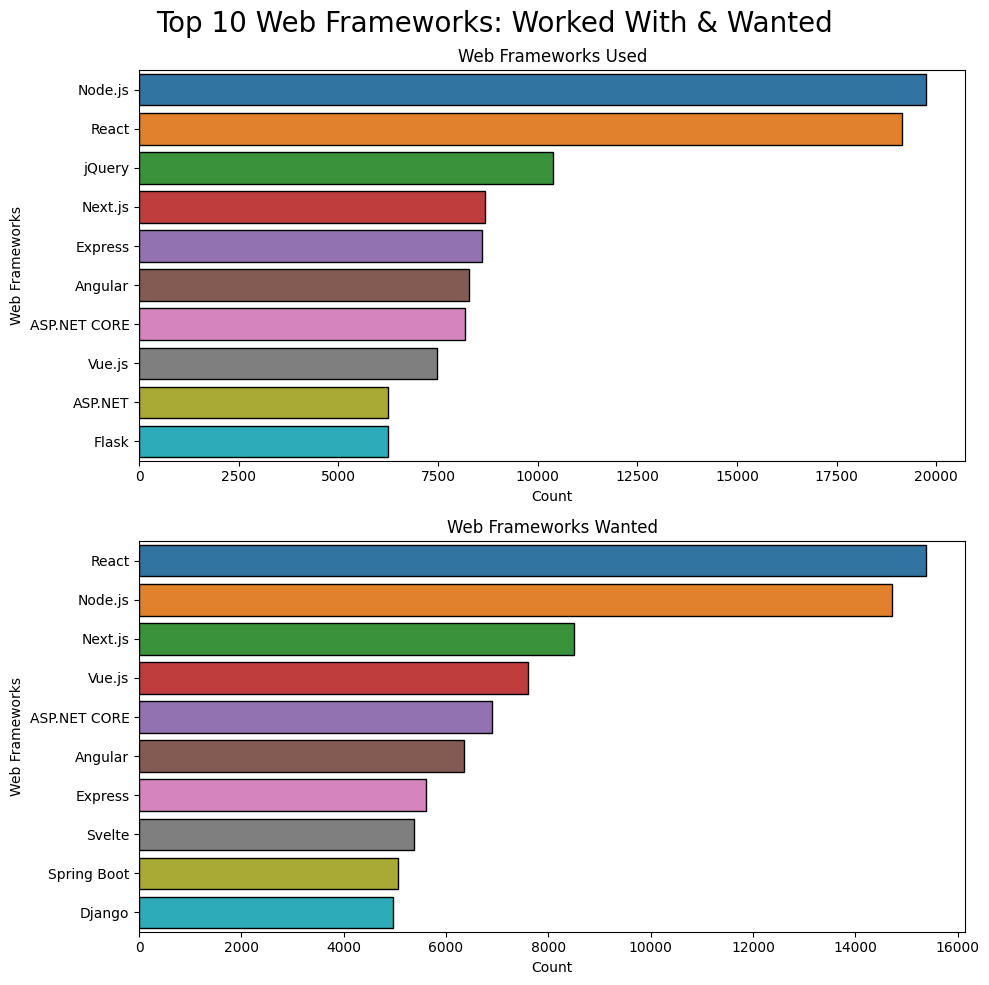

In [24]:
fig, axes = plt.subplots(2,1, figsize=(10,10))
fig.suptitle("Top 10 Web Frameworks: Worked With & Wanted", fontsize=20)

# Bar graph #1 - Top 10 Web Frameworks Worked With
sns.barplot(top10_web_worked, x='count', y='WebframeHaveWorkedWith', hue='WebframeHaveWorkedWith', edgecolor = 'black', ax=axes[0], dodge = False)
axes[0].set_title("Web Frameworks Used")
axes[0].set_ylabel("Web Frameworks")
axes[0].set_xlabel("Count")
axes[0].get_legend().remove()

# Bar graph #2 - Top 10 Web Frameworks Wanted
sns.barplot(top10_web_want, x='count', y='WebframeWantToWorkWith', hue='WebframeWantToWorkWith', edgecolor = 'black', ax=axes[1], dodge = False)
axes[1].set_title("Web Frameworks Wanted")
axes[1].set_ylabel("Web Frameworks")
axes[1].set_xlabel("Count")
axes[1].get_legend().remove()

plt.tight_layout()
plt.show()

So far, it seems like the web frameworks has the most variation between the two plots. The frameworks `jQuery`, `ASP.NET`, and `Django` are only present in the 'worked with' plot on the top. `Svelte`, `Spring Boot`, and `Django` are the frameworks that are unique on the 'wanted' plot on the bottom.

<h2 id = "tools">Tools Tech</h2>

Let's find the top 10 most popular web frameworks respondents worked with (`ToolsTechHaveWorkedWith`) and want to work with (`ToolsTechWantToWorkWith`).

### Worked With

In [25]:
# Select the tools tech worked with and store to a df
df_tools_worked = pd.read_sql("SELECT ToolsTechHaveWorkedWith FROM main", conn)

# Split the values
df_tools_worked['ToolsTechHaveWorkedWith'] = df_tools_worked['ToolsTechHaveWorkedWith'].str.split(";")

# Explode the df
df_tools_worked = df_tools_worked.explode('ToolsTechHaveWorkedWith')

# Find the top 10
top10_tools_worked = df_tools_worked.value_counts().sort_values(ascending=False).head(10).reset_index()
top10_tools_worked 

,ToolsTechHaveWorkedWith,count
0,Docker,29184
1,npm,26843
2,Pip,17541
3,Homebrew,12066
4,Make,11246
5,Vite,10797
6,Kubernetes,10484
7,Yarn,10198
8,Webpack,9961
9,NuGet,8693


### Want to Work With

In [26]:
# Select the tools tech wanted and store to a df
df_tools_want = pd.read_sql("SELECT ToolsTechWantToWorkWith FROM main", conn)

# Split the values
df_tools_want['ToolsTechWantToWorkWith'] = df_tools_want['ToolsTechWantToWorkWith'].str.split(";")

# Explode the df
df_tools_want = df_tools_want.explode('ToolsTechWantToWorkWith')

# Find the top 10
top10_tools_want = df_tools_want.value_counts().sort_values(ascending=False).head(10).reset_index()
top10_tools_want 

,ToolsTechWantToWorkWith,count
0,Docker,26224
1,npm,16697
2,Kubernetes,13176
3,Pip,11384
4,Vite,9975
5,Homebrew,8784
6,Make,7367
7,Terraform,6183
8,NuGet,6172
9,Visual Studio Solution,6052


### Visualizing

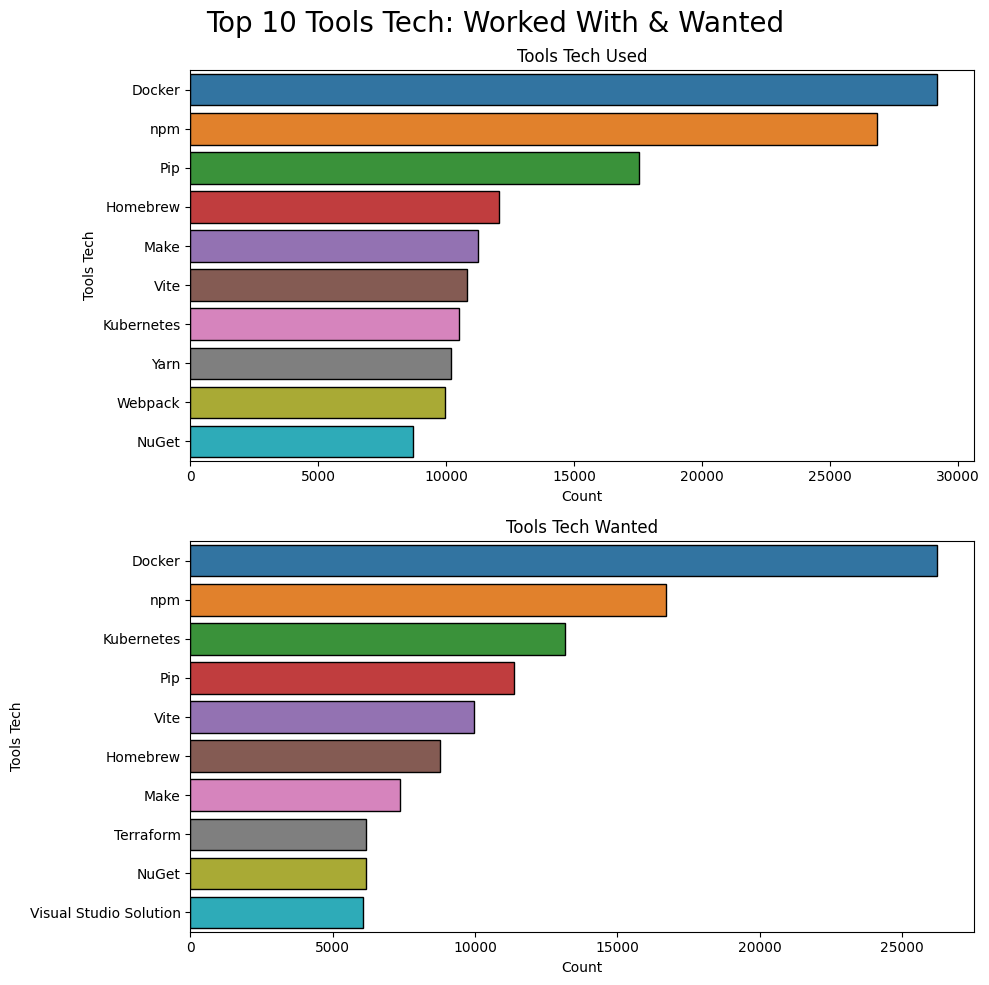

In [27]:
fig, axes = plt.subplots(2,1, figsize=(10,10))
fig.suptitle("Top 10 Tools Tech: Worked With & Wanted", fontsize=20)

# Bar graph #1 - Top 10 Tools Tech Worked With
sns.barplot(top10_tools_worked, x='count', y='ToolsTechHaveWorkedWith', hue='ToolsTechHaveWorkedWith', edgecolor = 'black', ax=axes[0], dodge = False)
axes[0].set_title("Tools Tech Used")
axes[0].set_ylabel("Tools Tech")
axes[0].set_xlabel("Count")
axes[0].get_legend().remove()

# Bar graph #2 - Top 10 Tools Tech Wanted
sns.barplot(top10_tools_want, x='count', y='ToolsTechWantToWorkWith', hue='ToolsTechWantToWorkWith', edgecolor = 'black', ax=axes[1], dodge = False)
axes[1].set_title("Tools Tech Wanted")
axes[1].set_ylabel("Tools Tech")
axes[1].set_xlabel("Count")
axes[1].get_legend().remove()

plt.tight_layout()
plt.show()

For tool techs, there are 2 out of 10 unique entries for each respective plot. `Yarn` and `Webpack` are unique tools in the 'worked with' plot. `Terraform` and `Visual Studio Solution` are unique tools in the 'wanted' plot.

<h2 id="collab">Collaboration Tools</h2>

Let's find the top 10 most popular web frameworks respondents worked with (`NEWCollabToolsHaveWorkedWith`) and want to work with (`NEWCollabToolsWantToWorkWith`).

### Worked With

In [28]:
# Select the Collab tools worked with and store to a df
df_collab_worked = pd.read_sql("SELECT NEWCollabToolsHaveWorkedWith FROM main", conn)

# Split the values
df_collab_worked['NEWCollabToolsHaveWorkedWith'] = df_collab_worked['NEWCollabToolsHaveWorkedWith'].str.split(";")

# Explode the df
df_collab_worked = df_collab_worked.explode('NEWCollabToolsHaveWorkedWith')

# Find the top 10
top10_collab_worked = df_collab_worked.value_counts().sort_values(ascending=False).head(10).reset_index()
top10_collab_worked 

,NEWCollabToolsHaveWorkedWith,count
0,Visual Studio Code,42632
1,Visual Studio,16972
2,IntelliJ IDEA,15521
3,Notepad++,13832
4,Vim,12493
5,Android Studio,9345
6,PyCharm,8760
7,Jupyter Notebook/JupyterLab,7422
8,Neovim,7220
9,Sublime Text,6315


### Want to Work With

In [29]:
# Select the Collab tools wanted and store to a df
df_collab_want = pd.read_sql("SELECT NEWCollabToolsWantToWorkWith FROM main", conn)

# Split the values
df_collab_want['NEWCollabToolsWantToWorkWith'] = df_collab_want['NEWCollabToolsWantToWorkWith'].str.split(";")

# Explode the df
df_collab_want = df_collab_want.explode('NEWCollabToolsWantToWorkWith')

# Find the top 10
top10_collab_want = df_collab_want.value_counts().sort_values(ascending=False).head(10).reset_index()
top10_collab_want 

,NEWCollabToolsWantToWorkWith,count
0,Visual Studio Code,33866
1,IntelliJ IDEA,11698
2,Visual Studio,11054
3,Vim,9605
4,Notepad++,8854
5,Neovim,7999
6,PyCharm,6480
7,Android Studio,6099
8,Jupyter Notebook/JupyterLab,5593
9,Xcode,3896


### Visualizing

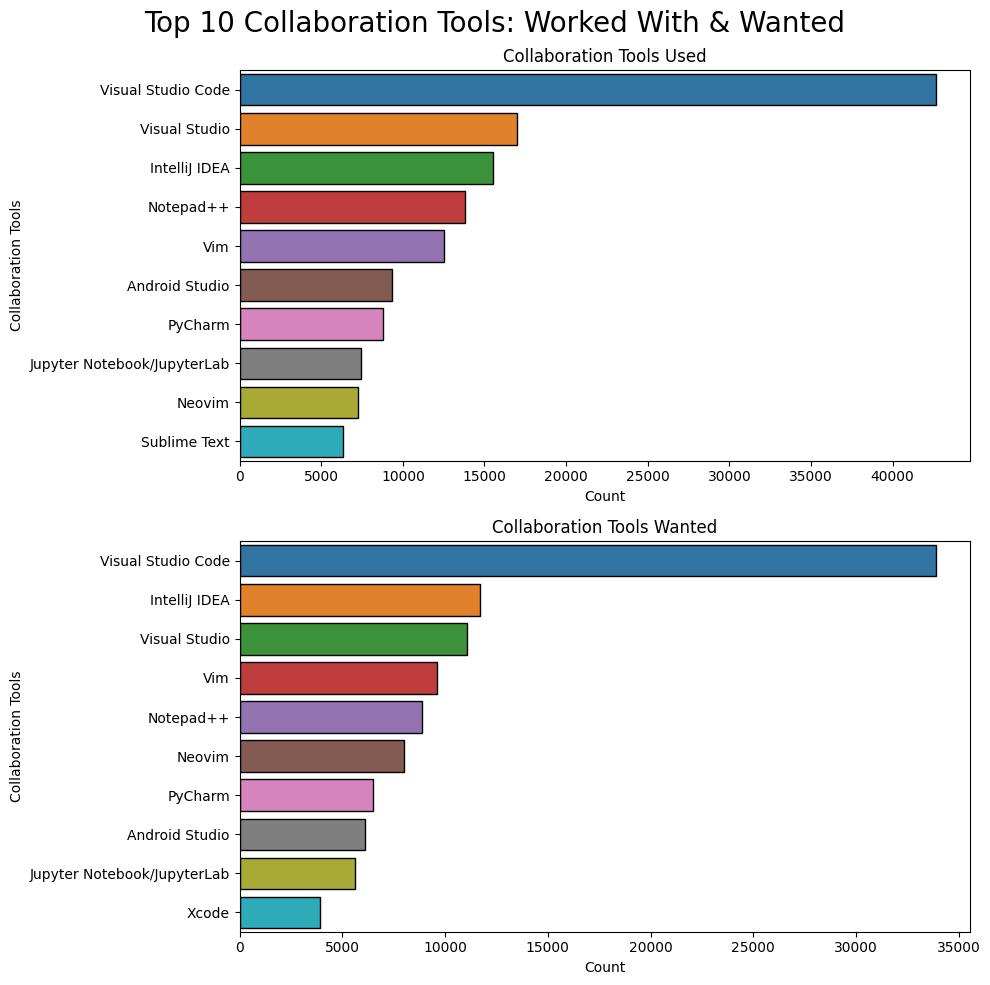

In [30]:
fig, axes = plt.subplots(2,1, figsize=(10,10))
fig.suptitle("Top 10 Collaboration Tools: Worked With & Wanted", fontsize=20)

# Bar graph #1 - Top 10 Collaboration Tools Worked With
sns.barplot(top10_collab_worked, x='count', y='NEWCollabToolsHaveWorkedWith', hue='NEWCollabToolsHaveWorkedWith', edgecolor = 'black', ax=axes[0], dodge = False)
axes[0].set_title("Collaboration Tools Used")
axes[0].set_ylabel("Collaboration Tools")
axes[0].set_xlabel("Count")
axes[0].get_legend().remove()

# Bar graph #2 - Top 10 Collaboration Tools  Wanted
sns.barplot(top10_collab_want, x='count', y='NEWCollabToolsWantToWorkWith', hue='NEWCollabToolsWantToWorkWith', edgecolor = 'black', ax=axes[1], dodge = False)
axes[1].set_title("Collaboration Tools Wanted")
axes[1].set_ylabel("Collaboration Tools")
axes[1].set_xlabel("Count")
axes[1].get_legend().remove()

plt.tight_layout()
plt.show()

For collaboration tools, 9 tools out of 10 are present in both plots. `Sublime Text` only appears on the 'worked with' plot and `Xcode` only appears on the 'wanted' plot. 

## Close Connection

In [31]:
# Remember to close the connection with the database at the end
conn.close()